# Section 1 Business Understanding

The analysis below is assuming that Ben wants to open a liquor store with limited budget, so he wants to determine its first store location and what to sell. 

Question 1: Which states have the highest alcohol consumption per capita? 

Question 2: Which state has the highest alcohol consumption growth from 2014 to 20216?

Question 3: What is the relationship amount beer, wine, and spirts consumption?

# Section 2 Data Understanding

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import seaborn as sns
%matplotlib inline

Gather Data

In [2]:
df = pd.read_csv('Alcohol_Consumption_US.csv')

Assess Data

In [3]:
df.head()

,State,State_abbrev,Year,Beer (Per capita consumption),Wine (Per capita consumption),Spirits (Per capita consumption),All beverages (Per capita consumption)
0,Alabama,AL,2016,1.09,0.26,0.65,2.01
1,Alabama,AL,2015,1.11,0.26,0.64,2.01
2,Alabama,AL,2014,1.13,0.25,0.62,2.00
3,Alabama,AL,2013,1.14,0.25,0.60,1.99
4,Alabama,AL,2012,1.16,0.24,0.60,2.00


In [4]:
print("The shape of the dateset is : {}.\n".format(df.shape))

print("The descrition of the dateset set: {}\n".format(df.describe()))

The shape of the dateset is : (2040, 7).

The descrition of the dateset set:               Year  Beer (Per capita consumption)  \
count  2040.000000                    2040.000000   
mean   1996.500000                       1.292020   
std      11.546227                       0.234227   
min    1977.000000                       0.630000   
25%    1986.750000                       1.130000   
50%    1996.500000                       1.280000   
75%    2006.250000                       1.420000   
max    2016.000000                       2.170000   

       Wine (Per capita consumption)  Spirits (Per capita consumption)  \
count                    2040.000000                       2040.000000   
mean                        0.339324                          0.851485   
std                         0.184980                          0.362751   
min                         0.080000                          0.360000   
25%                         0.200000                          0.630000   
5

As the dataset contains alcohol consumption date between 1977 and 2016, the analysis mainly uses the date between 2014 and 2016. Becuase the dataset is small, although most of analysis will be using 2014 to 2016 data, it is no need to get rid of data prior to 2014. Also, because 'State' and 'State_abbrev' are overlap, "State" will be removed in the cleaning data process.

# Section 3 Data Preparation

Clean Data - Identify and eliminate any missing values

In [5]:
print("The porportion of missing value in the dataset: \n {}.".format(df.isnull().mean()))

The porportion of missing value in the dataset: 
 State                                     0.0
State_abbrev                              0.0
Year                                      0.0
Beer (Per capita consumption)             0.0
Wine (Per capita consumption)             0.0
Spirits (Per capita consumption)          0.0
All beverages (Per capita consumption)    0.0
dtype: float64.


There is no missing value so no further procedrues is performed.

Clean Data - Remove unnecessary column 

In [6]:
df.drop(['State'],axis=1,inplace=True)

In [7]:
df.head()

,State_abbrev,Year,Beer (Per capita consumption),Wine (Per capita consumption),Spirits (Per capita consumption),All beverages (Per capita consumption)
0,AL,2016,1.09,0.26,0.65,2.01
1,AL,2015,1.11,0.26,0.64,2.01
2,AL,2014,1.13,0.25,0.62,2.00
3,AL,2013,1.14,0.25,0.60,1.99
4,AL,2012,1.16,0.24,0.60,2.00


# Section 4 Evaluate the Results

Analyze Data

Question 1: Which states have the highest alcohol consumption per capita?

Part 1. Which states have the highest alcohol consumption per capita between 2014 and 2016?

In [8]:
# to define a reusable functin to answer the question for each type of alcohol.
def highest_consumption (name='All beverages (Per capita consumption)', year=2016): 
    '''
    This function provdies the result of which state has the highest consumtion on what type of alcohol in which year.
    The default value is calculating the overall alcohol consumption in 2016.
    
    Input:
    name (e.g., Beer (Per capita consumption), Wine (Per capita consumption), Spirits (Per capita consumption))
    year (e.g., 1977 to 2016)
    
    Output:
    generate the result of in which year, which state is the highest consumtion state on that specific type of alcohol 
    and the relevant number of Per capita consumption.
    '''
    print("In {}, {} is the highest {} consumption state and the number of Per capita consumption is {}".
          format(year, df[df['Year']==year][['State_abbrev',name]].max()[0],name, 
          df[df['Year']==year][['State_abbrev',name]].max()[1],))

a. Which states have the highest beer consumption per capita between 2014 and 2016?

In [9]:
for year in range(2014,2017,1):
    print (highest_consumption('Beer (Per capita consumption)',year))

In 2014, WY is the highest Beer (Per capita consumption) consumption state and the number of Per capita consumption is 1.69
None
In 2015, WY is the highest Beer (Per capita consumption) consumption state and the number of Per capita consumption is 1.88
None
In 2016, WY is the highest Beer (Per capita consumption) consumption state and the number of Per capita consumption is 1.87
None


b. Which states have the highest wine consumption per capita between 2014 and 2016?

In [10]:
for year in range(2014,2017,1):
    print (highest_consumption('Wine (Per capita consumption)',year))

In 2014, WY is the highest Wine (Per capita consumption) consumption state and the number of Per capita consumption is 1.12
None
In 2015, WY is the highest Wine (Per capita consumption) consumption state and the number of Per capita consumption is 1.14
None
In 2016, WY is the highest Wine (Per capita consumption) consumption state and the number of Per capita consumption is 1.19
None


c. Which states have the highest spirits consumption per capita between 2014 and 2016?

In [11]:
for year in range(2014,2017,1):
    print (highest_consumption('Spirits (Per capita consumption)',year))

In 2014, WY is the highest Spirits (Per capita consumption) consumption state and the number of Per capita consumption is 1.96
None
In 2015, WY is the highest Spirits (Per capita consumption) consumption state and the number of Per capita consumption is 1.96
None
In 2016, WY is the highest Spirits (Per capita consumption) consumption state and the number of Per capita consumption is 2.0
None


d. Which states have the highest overall alcohol consumption per capita between 2014 and 2016?

In [12]:
for year in range(2014,2017,1):
    print (highest_consumption('All beverages (Per capita consumption)',year))

In 2014, WY is the highest All beverages (Per capita consumption) consumption state and the number of Per capita consumption is 4.54
None
In 2015, WY is the highest All beverages (Per capita consumption) consumption state and the number of Per capita consumption is 4.72
None
In 2016, WY is the highest All beverages (Per capita consumption) consumption state and the number of Per capita consumption is 4.76
None


Based on the result, WY is the highest alcohol consumption state including beer, wine and spirits between 2014 and 2016. Therefore, WY will be the potential location for Ben to open the liquid store but also need to consider the growth potention, which will be analyzed in the next part.

Question 2: Which state has the highest alcohol comsumption growth from 2014 to 20216?

Part 2. Which state has the highest alcohol comsumption growth from 2014 to 20216?

In [13]:
# to define a reusable functin to answer the question for each type of alcohol.
def highest_growth (name='All beverages (Per capita consumption)'):
    '''
    This function provdies the result of which state has the highest alcohol consumtion growth of each type of alcohol from 2014 to 2016.
    The default value is calculating the overall alcohol consumption.
    
    Input:
    name (i.e., Beer (Per capita consumption), Wine (Per capita consumption), Spirits (Per capita consumption), All beverages (Per capita consumption))
    
    Output:
    generate the result of which state has the highest alcohol consumtion growth of the specific type of alcohol from 2014 to 2016.
    '''
    df_2014=df[df['Year']==2014][['State_abbrev',name]].reset_index()
    df_2014.pop('index')
    df_2014.rename(columns={name:'2014 {}'.format(name)},inplace=True)
    df_2015=df[df['Year']==2015][[name]].reset_index()
    df_2015.pop('index')
    df_2015.rename(columns={name:'2015 {}'.format(name)},inplace=True)
    df_2016=df[df['Year']==2016][[name]].reset_index()
    df_2016.pop('index')
    df_2016.rename(columns={name:'2016 {}'.format(name)},inplace=True)
    df_growth=pd.concat([df_2014,df_2015,df_2016],axis=1,join='inner')
    df_growth['2014_2016_Growth']=(df_growth['2016 {}'.format(name)]-df_growth['2014 {}'.format(name)])/df_growth['2014 {}'.format(name)]
    return df_growth.sort_values(by=['2014_2016_Growth'],ascending=False).iloc[0]

a. Which states have the highest beer consumption growth from 2014 and 2016 and what is the growth number?

In [14]:
highest_growth('Beer (Per capita consumption)')

State_abbrev                                NH
2014 Beer (Per capita consumption)        1.69
2015 Beer (Per capita consumption)        1.88
2016 Beer (Per capita consumption)        1.87
2014_2016_Growth                      0.106509
Name: 29, dtype: object

b. Which states have the highest wine consumption growth from 2014 and 2016 and what is the growth number?

In [15]:
highest_growth('Wine (Per capita consumption)')

State_abbrev                            TN
2014 Wine (Per capita consumption)    0.25
2015 Wine (Per capita consumption)    0.27
2016 Wine (Per capita consumption)    0.33
2014_2016_Growth                      0.32
Name: 42, dtype: object

c. Which states have the highest spirits consumption growth from 2014 and 2016 and what is the growth number?

In [16]:
highest_growth('Spirits (Per capita consumption)')

State_abbrev                                  RI
2014 Spirits (Per capita consumption)       0.86
2015 Spirits (Per capita consumption)       0.99
2016 Spirits (Per capita consumption)       1.05
2014_2016_Growth                         0.22093
Name: 39, dtype: object

Based on the result above, NH has the highest growth of beer consumption from 2014 to 2016 and the number is 10.65%; TN has the highest growth of wine consumption from 2014 to 2016 and the number is 0.32%; RI has the highest growth of spirits consumption from 2014 to 2016 and the number is 22.09%.

Part 4. What is the growth in the state which has the highest alcohol consumption between 2014 and 2016?

In [17]:
#3 to analyze the growth in WY with the number in part 1 analysis
print('growth of beer in WY is:',str((1.87-1.69)/1.69))

print('growth of wine in WY is:',str((1.19-1.12)/1.12))

print('growth of spirits in WY is:',str((2-1.96)/1.96))

growth of beer in WY is: 0.10650887573964507
growth of wine in WY is: 0.062499999999999854
growth of spirits in WY is: 0.02040816326530614


Based on the result above, WY growth of beer consumption is near the highest growth in NH, and other two types has much lower growth number. It indicates that regarding the beer consumption, WY is not only the highest consumption State but also remain highest growth there. Therefore, if opening a liquid store in WY, it is better to focus on selling beer. To make a better decision, the relationsihp among among beer, wine,  and spirts comsumption is analyzed in next part.

Question 3: What is the relationship amount beer, wine, and spirts comsumption?

Part 5. What is the relationship among beer, wine,  and spirts comsumption?

In [18]:
# to analyze the relationship among beer, wine,  and spirts comsumption, it is better to generate a new dataframe to only contain these three elements

df2 = df[['Beer (Per capita consumption)','Wine (Per capita consumption)','Spirits (Per capita consumption)']]
print(df2.head())

   Beer (Per capita consumption)  Wine (Per capita consumption)  \
0                           1.09                           0.26   
1                           1.11                           0.26   
2                           1.13                           0.25   
3                           1.14                           0.25   
4                           1.16                           0.24   

   Spirits (Per capita consumption)  
0                              0.65  
1                              0.64  
2                              0.62  
3                              0.60  
4                              0.60  


<AxesSubplot:>

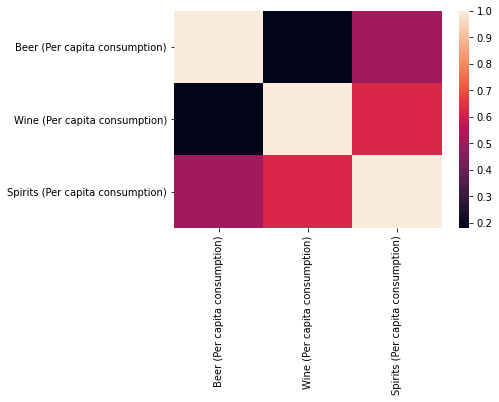

In [19]:
# to generate a heatmap to briefly understand the relationship amoong beer, wine, and spirts comsumption
sns.heatmap(df2.corr())

Basd on the heatmap, beer consumption seems like has no impact from/on wine consumption, but has slight impact with spirits but it is unclear. To obtain a better understanding about the relationship among them, LinearRegression will be used below.

In [20]:
# set spirits as Y because the relationship between beer and spirits is unclear but wine and spirits has position relationship accoridng to the heatmap above.
X = df2.drop(['Spirits (Per capita consumption)'],axis=1)
Y = df2['Spirits (Per capita consumption)']
train_X, valid_X, train_y, valid_y = train_test_split(X, Y, test_size=0.4, random_state=1)
lm_model = LinearRegression(normalize=True)
lm_model.fit(train_X, train_y)
y_test_preds=lm_model.predict(valid_X)
r2_score(valid_y, y_test_preds)

0.544017693256152

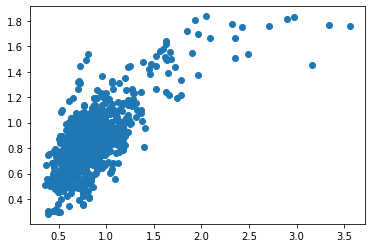

In [21]:
plt.scatter(valid_y,y_test_preds)

In [22]:
coeff_df = pd.DataFrame(lm_model.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
Beer (Per capita consumption),0.629238
Wine (Per capita consumption),1.082361


Based on the results above, r2_score indicates the model is not good fit, but the scatter graph concentrate results together, and the model is not mainly used for predcition so the model is acceptable. Also, based on the coefficient number, it seems like the relatinoship between beer and spirits is insignficiant and approves that wine and spirits has better relastionship. It indicates that beer consumption has no impact from/on wine and spirits consumption, but wine and spirits has positive impact between each other.

# Conclusion

Based on the overall analysis above, Ben should open his liquid store in WY and focus on selling beer.